In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from compass.core import MRI
from pathlib import Path
import matplotlib.pylab as plt
from pprint import pprint

In [3]:
mri_path = "/home/vlad/Projects/tmp/wsi/36394.h5"
annot_storage = "/home/vlad/Projects/tmp/wsi/36394.sqlite"
mri_obj = MRI(mri_path, open_mode='a')

In [4]:
pprint(mri_obj.info)

{'base_mag_step': np.int64(2),
 'base_mpp': np.float64(0.4916),
 'base_objective_power': np.float64(20.0),
 'compass_version': np.float64(1.0),
 'level_count': np.int64(7),
 'numpy_ordering': np.int64(1)}


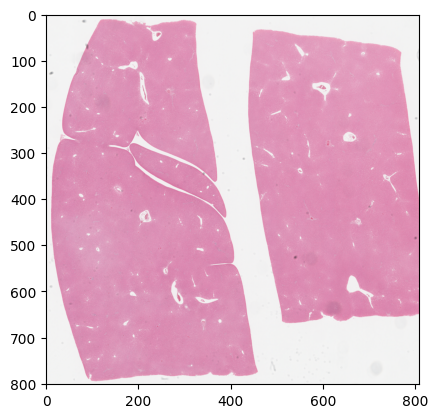

In [5]:
img = mri_obj.get_plane(5)
plt.imshow(img)

In [6]:
mri_obj.shape(level=5)

ImageShape(width=810, height=802)

In [7]:
mri_obj.get_mpp_for_level(5)

15.7312

Create some test annotations, without any specific meaning:

In [8]:
import compass.annot as ann

In [9]:
pt1 = ann.Point((200, 200), name="PT1", data={'a': 5, 'b': 10})
pt2 = ann.Point((200, 600), name="PT2", data={'b': 12.5, 'c': 20.5})
pt3 = ann.Point((600, 500), name="PT3")
pl1 = ann.Polygon([(100, 100), (100, 500), (500, 500), (500,100)], name="Poly1", data={'e': 10.5})
cr1 = ann.Circle((200, 400), 50, name="Circ1", data={'a': 4.5, 'd': 2})

In [10]:
lv = 5
ann1 = ann.Annotation(
    name = "Annotation 1", 
    image_shape = mri_obj.shape(lv), 
    mpp = mri_obj.get_mpp_for_level(lv)
)

In [11]:
ann1.add_annotation_object(pt1, group="no_group", layer="base")
ann1.add_annotation_object(pt2, group="group one", layer="base")
ann1.add_annotations([pt3, pl1, cr1], group="group two", layer="new layer")

In [12]:
ann1.asdict()

{'name': 'Annotation 1',
 'image_shape': ImageShape(width=810, height=802),
 'mpp': 15.7312,
 'id_layer': {0: 'base', 1: 'new layer'},
 'id_group': {0: 'no_group', 1: 'group one', 2: 'group two'},
 'id_reg': {'layer': 1, 'group': 2, 'object': 4},
 'layers': {0: [0, 1], 1: [2]},
 'annotations': {0: [{'id': 0,
    'annotation_type': 'POINT',
    'name': 'PT1',
    'data': {'a': 5, 'b': 10},
    'geom': 'POINT (200 200)'}],
  1: [{'id': 1,
    'annotation_type': 'POINT',
    'name': 'PT2',
    'data': {'b': 12.5, 'c': 20.5},
    'geom': 'POINT (200 600)'}],
  2: [{'id': 2,
    'annotation_type': 'POINT',
    'name': 'PT3',
    'data': {},
    'geom': 'POINT (600 500)'},
   {'id': 3,
    'annotation_type': 'POLYGON',
    'name': 'Poly1',
    'data': {'e': 10.5},
    'geom': 'POLYGON ((100 100, 100 500, 500 500, 500 100, 100 100))'},
   {'id': 4,
    'annotation_type': 'CIRCLE',
    'name': 'Circ1',
    'data': {'a': 4.5, 'd': 2},
    'geom': 'POLYGON ((200 450, 235.355339 435.355339, 250 4

In [13]:
# bring the annotation to highest magnification leve:
ann1.match_image(mri_obj, 0)

In [14]:
print(mri_obj._mag.get_mpp_for_level(0))
print(mri_obj.get_mpp_for_level(5))

0.4916
15.7312


In [15]:
ann1.asdict()

{'name': 'Annotation 1',
 'image_shape': ImageShape(width=25895, height=25642),
 'mpp': 0.4916,
 'id_layer': {0: 'base', 1: 'new layer'},
 'id_group': {0: 'no_group', 1: 'group one', 2: 'group two'},
 'id_reg': {'layer': 1, 'group': 2, 'object': 4},
 'layers': {0: [0, 1], 1: [2]},
 'annotations': {0: [{'id': 0,
    'annotation_type': 'POINT',
    'name': 'PT1',
    'data': {'a': 5, 'b': 10},
    'geom': 'POINT (6394.170438 6394.170438)'}],
  1: [{'id': 1,
    'annotation_type': 'POINT',
    'name': 'PT2',
    'data': {'b': 12.5, 'c': 20.5},
    'geom': 'POINT (6394.170438 19182.511314)'}],
  2: [{'id': 2,
    'annotation_type': 'POINT',
    'name': 'PT3',
    'data': {},
    'geom': 'POINT (19182.511314 15985.426095)'},
   {'id': 3,
    'annotation_type': 'POLYGON',
    'name': 'Poly1',
    'data': {'e': 10.5},
    'geom': 'POLYGON ((3197.085219 3197.085219, 3197.085219 15985.426095, 15985.426095 15985.426095, 15985.426095 3197.085219, 3197.085219 3197.085219))'},
   {'id': 4,
    'ann

In [16]:
from compass.annot_sqlite_storage import (
    init_db,
    save_annotation,
    load_annotation,
    query_object_ids_in_layer,
    query_object_ids_in_group,
    query_object_ids_in_layer_roi,
    fetch_objects,
)

In [17]:
init_db(annot_storage)

In [18]:
save_annotation(ann1, annot_storage)

In [19]:
ann2 = load_annotation(annot_storage)

In [20]:
ann1.asdict()

{'name': 'Annotation 1',
 'image_shape': ImageShape(width=25895, height=25642),
 'mpp': 0.4916,
 'id_layer': {0: 'base', 1: 'new layer'},
 'id_group': {0: 'no_group', 1: 'group one', 2: 'group two'},
 'id_reg': {'layer': 1, 'group': 2, 'object': 4},
 'layers': {0: [0, 1], 1: [2]},
 'annotations': {0: [{'id': 0,
    'annotation_type': 'POINT',
    'name': 'PT1',
    'data': {'a': 5, 'b': 10},
    'geom': 'POINT (6394.170438 6394.170438)'}],
  1: [{'id': 1,
    'annotation_type': 'POINT',
    'name': 'PT2',
    'data': {'b': 12.5, 'c': 20.5},
    'geom': 'POINT (6394.170438 19182.511314)'}],
  2: [{'id': 2,
    'annotation_type': 'POINT',
    'name': 'PT3',
    'data': {},
    'geom': 'POINT (19182.511314 15985.426095)'},
   {'id': 3,
    'annotation_type': 'POLYGON',
    'name': 'Poly1',
    'data': {'e': 10.5},
    'geom': 'POLYGON ((3197.085219 3197.085219, 3197.085219 15985.426095, 15985.426095 15985.426095, 15985.426095 3197.085219, 3197.085219 3197.085219))'},
   {'id': 4,
    'ann

In [21]:
ann2.asdict()

{'name': 'Annotation 1',
 'image_shape': ImageShape(width=25895, height=25642),
 'mpp': 0.4916,
 'id_layer': {0: 'base', 1: 'new layer'},
 'id_group': {0: 'no_group', 1: 'group one', 2: 'group two'},
 'id_reg': {'layer': 1, 'group': 2, 'object': 4},
 'layers': {0: [0, 1], 1: [2]},
 'annotations': {0: [{'id': 0,
    'annotation_type': 'POINT',
    'name': 'PT1',
    'data': {'a': 5.0, 'b': 10.0},
    'geom': 'POINT (6394.170438 6394.170438)'}],
  1: [{'id': 1,
    'annotation_type': 'POINT',
    'name': 'PT2',
    'data': {'b': 12.5, 'c': 20.5},
    'geom': 'POINT (6394.170438 19182.511314)'}],
  2: [{'id': 2,
    'annotation_type': 'POINT',
    'name': 'PT3',
    'data': {},
    'geom': 'POINT (19182.511314 15985.426095)'},
   {'id': 3,
    'annotation_type': 'POLYGON',
    'name': 'Poly1',
    'data': {'e': 10.5},
    'geom': 'POLYGON ((3197.085219 3197.085219, 3197.085219 15985.426095, 15985.426095 15985.426095, 15985.426095 3197.085219, 3197.085219 3197.085219))'},
   {'id': 4,
    